# <center> ЦОИ №1

In [2]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

## <center> Методы работы с изображениями



-  Эквализация гистограммы

-  Гамма-коррекция

-  Кусочно-линейная коррекция

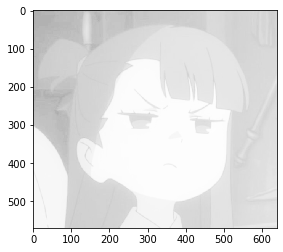

In [3]:
image_old = Image.open('/Users/Namake/Downloads/xgEoj9j1Umc.jpg')
image = Image.open('/Users/Namake/Downloads/xgEoj9j1Umc.jpg')
draw = ImageDraw.Draw(image)
width = image.size[0]
height = image.size[1]
pix = image.load()
gamma = 0.1
S_arr = []
for i in range(width):
    for j in range(height):
        a = pix[i,j][0]
        b = pix[i,j][1]
        c = pix[i,j][2]
        S = (a+b+c)//(3)
        S_arr += [S]
        S1 = int(255*(S/255)**gamma)
        draw.point((i,j),(S1,S1,S1))
plt.imshow(image)

In [4]:
image.show()

In [43]:
S_arr = np.array(S_arr)

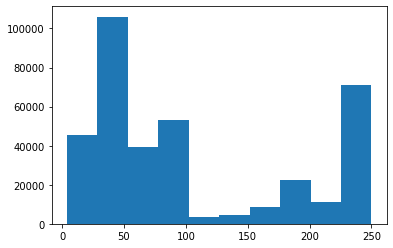

In [16]:
image_old = Image.open('/Users/Namake/Downloads/xgEoj9j1Umc.jpg')
image = Image.open('/Users/Namake/Downloads/xgEoj9j1Umc.jpg')
draw = ImageDraw.Draw(image)
width = image.size[0]
height = image.size[1]
pix = image.load()
S_arr = []
for i in range(width):
    for j in range(height):
        a = pix[i,j][0]
        b = pix[i,j][1]
        c = pix[i,j][2]
        S = (a+b+c)//3
        S_arr += [S]
        if 100 <= S <= 250 :
            S += 50
        elif 100 >= S >= 50:
            S-=50
        draw.point((i,j),(S,S,S))
plt.hist(S_arr)
plt.show()

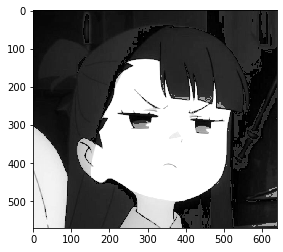

In [17]:
plt.imshow(image)

In [18]:
image.show()

## <center> Маски

\[
A = \begin{bmatrix}
    1&&1&&1\\
    1&&-8&&1\\
    1&&1&&1
    \end{bmatrix}
\text{– пример маски}
\]


Не всегда фильтры использую для обработки. Так же их можно использовать для обнаружения объекта.

\[
B = \begin{bmatrix}
    1&&1&&-2\\
    1&&-2&&1\\
    -2&&1&&1
    \end{bmatrix}
\text{– найти диагональную линию}
\]

В юбщем виде

\[
    \begin{bmatrix}
    h_{1,1}&&h_{0,1}&&h_{-1,1}\\
    h_{1,0}&&h_{0,0}&&h_{-1,0}\\
    h_{1,-1}&&h_{0,-1}&&h_{-1,-1}
    \end{bmatrix}
\text{– найти диагональную линию}
\]

Тогда Отклик ${i_0j_0}$  = 

\[\sum p_{i_0 + i,j_0+j} \cdot h_{-i,-j}\]

где $h$ – значение яркости пикселя

\[S \longrightarrow H*S \]
– ЛИС-фильтр

\[\delta_{ij} \longrightarrow H_{ij} \]
– ФРТ

### <center> Диффренециальные фильтры
    
    
-  Лаплас

- Собель

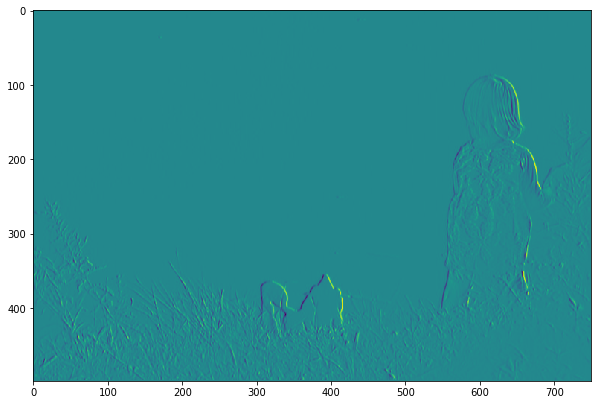

In [88]:
image = Image.open('/Users/Namake/Downloads/_MG_5849-2.jpg')
draw = ImageDraw.Draw(image)
width = image.size[0]
height = image.size[1]
pix = image.load()
sobel = 0.125*np.array([[1,0,-1],
                        [2,0,-2],
                        [1,0,-1]], dtype = 'float64')

sobel = np.array([[1,1,-2],
                        [1,1,-2],
                        [1,1,-2]], dtype = 'float64')


Sm = np.zeros([height,width])

for i in range(width):
    for j in range(height):
        a = pix[i,j][0]
        b = pix[i,j][1]
        c = pix[i,j][2]
        S = (a+b+c)//(3)
        Sm[j,i] = S
        
plt.figure(figsize = (10,10))
res = np.zeros([height,width])
for j in range(0,height):
    for i in range(0,width):
        if Sm[j:j+3:,i:i+3:].shape != tuple((3,3)):
            break
        res[j,i] = int(np.sum(Sm[j:j+3:,i:i+3:]*sobel))
plt.imshow(res)

In [89]:
for j in range(height):
    for i in range(width):
        draw.point((i,j),(255 - int(res[j,i]),255 - int(res[j,i]),255 - int(res[j,i])))
image.show()

In [225]:
def Newton1(z0,eps = 0.1):
    z = z0
    z_old = np.inf
    #print(func(z).real)
    re = z.real
    im = z.imag
    while np.round(np.abs(z - z_old),10) != 0.0:
        z_old = z
        z = (2/3)*z - 1/(3*(z**2))
    return z

In [226]:
def Newton2(z0,eps = 0.1):
    z = z0
    z_old = np.inf
    #print(func(z).real)
    re = z.real
    im = z.imag
    while np.round(np.abs(z - z_old),10) != 0.0:
        z_old = z
        z = z - (z**5-1)/(5*(z**4))
    return z

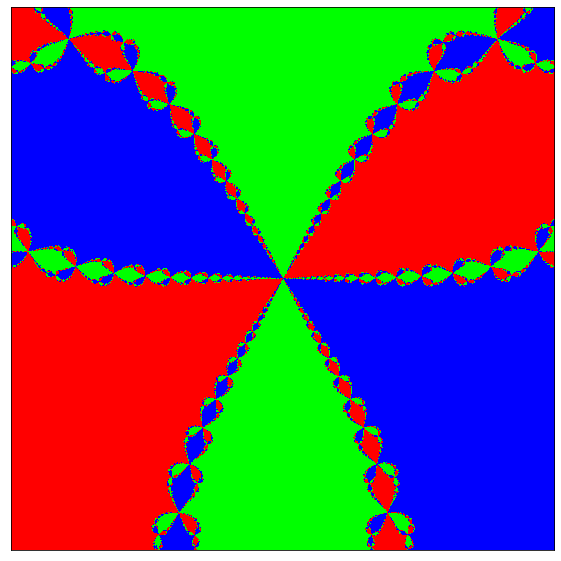

In [260]:
fig = plt.figure(figsize = (10,10))
ker = []
w = np.array([0,0,0,0], dtype = 'float64')
r = np.array([1.,0,0,1.], dtype = 'float64')
g = np.array([0.,1.,0.,1.], dtype = 'float64')
b = np.array([0,0,1.,1.], dtype = 'float64')
color = [r,g,b]
pic = np.zeros((600,600,4))
for i in range(pic.shape[0]):
    for j in range(pic.shape[1]):
        pic[i][j] = np.array([0.,0.,0.,1.], dtype = 'float64')
        z0 =  complex(i/601 - 1/2 , j/601 - 1/2)
        res = Newton1(z0)
        if np.round(res,1) not in ker:
            ker += [np.round(res,1)]
        else: 
            pic[i][j] = color[ker.index(np.round(res,1))]
            

plt.imshow(pic)

In [ ]:
fig = plt.figure(figsize = (10,10))
ker = []
w = np.array([1,1,1,1], dtype = 'float64')
k = np.array([0,0,0,1], dtype = 'float64')
r = np.array([1.,0,0,1.], dtype = 'float64')
g = np.array([0.,1.,0.,1.], dtype = 'float64')
b = np.array([0,0,1.,1.], dtype = 'float64')
color = [r,g,b,w,k]
pic = np.zeros((600,600,4))
for i in range(pic.shape[0]):
    for j in range(pic.shape[1]):
        pic[i][j] = np.array([0.,0.,0.,1.], dtype = 'float64')
        z0 =  complex(i/601 - 1/2 , j/601 - 1/2)
        res = Newton2(z0)
        if np.round(res,1) not in ker:
            ker += [np.round(res,1)]
        else: 
            #print(ker)
            pic[i][j] = color[ker.index(np.round(res,1))]
            

plt.imshow(pic)